
参考：
1. [基于kd树的knn实现](https://seanlee97.github.io/2018/11/18/%E5%9F%BA%E4%BA%8Ekd%E6%A0%91%E7%9A%84knn%E5%AE%9E%E7%8E%B0/)
2. [维基百科‘k-d tree’解释](https://en.wikipedia.org/wiki/K-d_tree)

疑问：如何返回前K个最相似


## 前置知识  namedtuple
namedtuple 为具名元组，是元组的升级版

In [30]:
import collections

# 两种方法来给 namedtuple 定义方法名
#User = collections.namedtuple('User', ['name', 'age', 'id'])
User = collections.namedtuple('User', 'name age id')
user = User('tester', '22', '464643123')
print(user.age)
print(user)

# 类似地，可以构建 node 树节点
class Node(namedtuple("Node", "location left_child right_child")):
    def __repr__(self):
        return pformat(tuple(self))
Node(2, Node(3,1,0), Node(5,7, 9))

22
User(name='tester', age='22', id='464643123')


(2, (3, 1, 0), (5, 7, 9))

## kd 树构建
通过递归形式构建
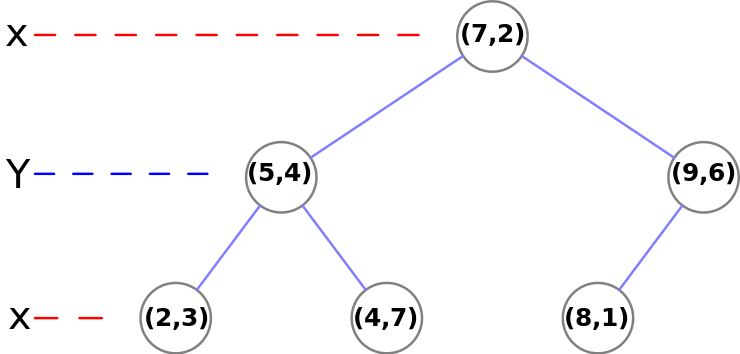

In [19]:
from collections import namedtuple
from operator import itemgetter
from pprint import pformat

class Node(namedtuple("Node", "location left_child right_child")):
    def __repr__(self):
        return pformat(tuple(self))

def kdtree(point_list, depth: int = 0):
    if not point_list:
        return None

    k = len(point_list[0])  # assumes all points have the same dimension
    # Select axis based on depth so that axis cycles through all valid values
    axis = depth % k

    # Sort point list by axis and choose median as pivot element
    point_list.sort(key=itemgetter(axis))
    median = len(point_list) // 2

    # Create node and construct subtrees
    # depth +1 实现轴的交替选择
    return Node(
        location=point_list[median],
        left_child=kdtree(point_list[:median], depth + 1),
        right_child=kdtree(point_list[median + 1 :], depth + 1),
    )

def main():
    """Example usage"""
    point_list = [(7, 2), (5, 4), (9, 6), (4, 7), (8, 1), (2, 3)]
    tree = kdtree(point_list)
    print(tree)

if __name__ == "__main__":
    main()

((7, 2),
 ((5, 4), ((2, 3), None, None), ((4, 7), None, None)),
 ((9, 6), ((8, 1), None, None), None))


## kd 树搜索最近邻

先找到最接近的叶子节点，然后回溯更新；并且，只要与节点的超平面相交，就要进入另一个分支节点判断
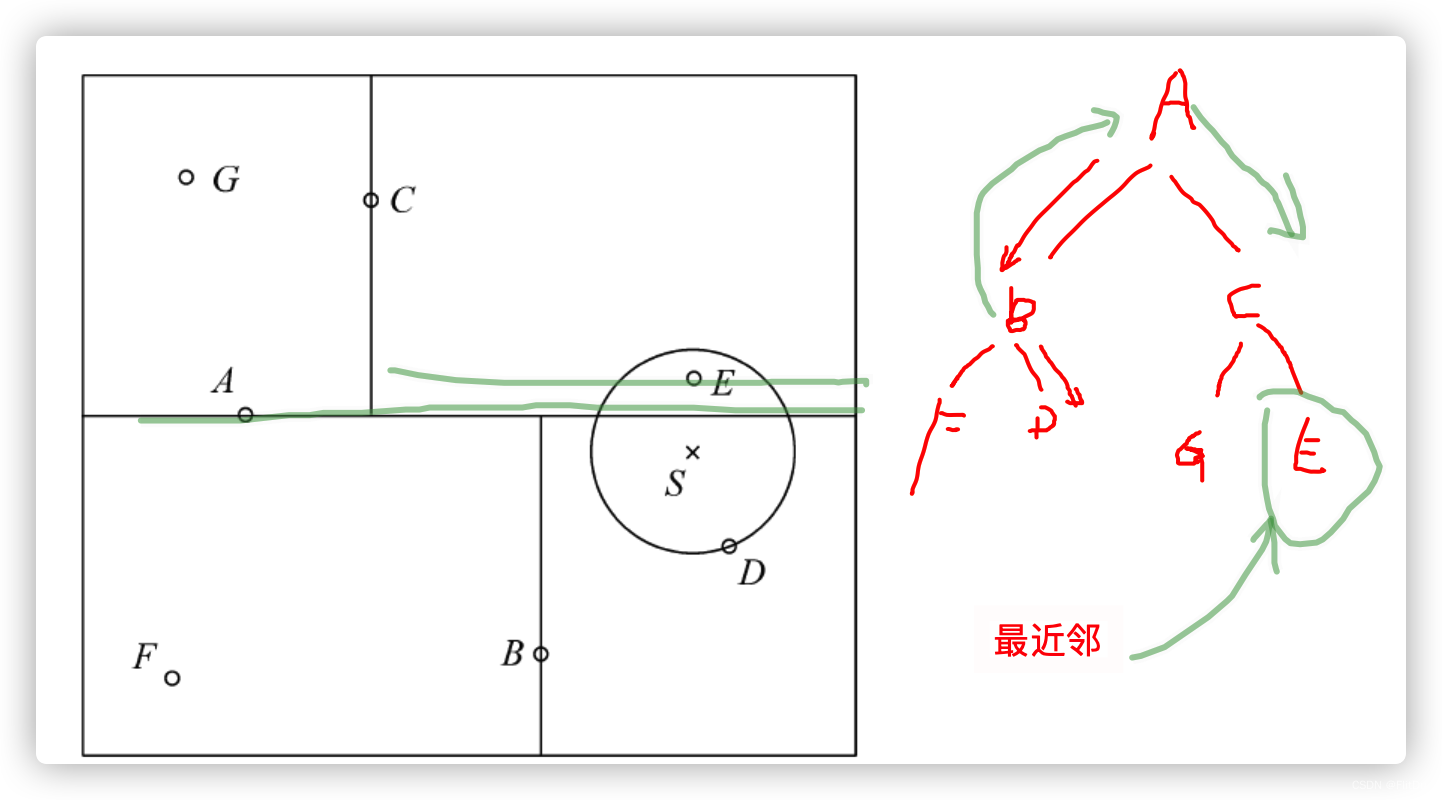

算法实现参考：[KNN算法与Kd树](https://www.cnblogs.com/21207-iHome/p/6084670.html)
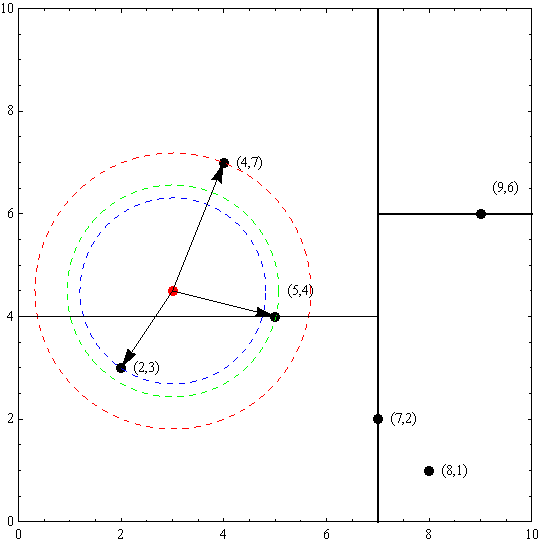

## 返回k 个最近

In [124]:
from sklearn.neighbors import KDTree
import numpy as np

# np.random.seed(0)
X = np.random.random((100000, 50))
X

tree = KDTree(X)
tree


dist, ind = tree.query([X[0]-np.random.rand(1)], k=5)
print(dist)
print(ind)

[[5.08317172 5.24825269 5.25546653 5.34369517 5.34763518]]
[[65750 65093 52095 66627 11009]]
